In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from google.colab.patches import cv2_imshow

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os

# Check the contents of the mounted Google Drive
drive_path = '/content/drive/MyDrive/'



In [5]:
import  zipfile

zipfile_name = "/content/drive/MyDrive/mask_dataset.zip"
try:
  with zipfile.ZipFile(zipfile_name) as zp:
    zp.extractall()
  print("Successfully extracted")
except:
  print('Error Appeared')
  print("Please CHeck the file")

Successfully extracted


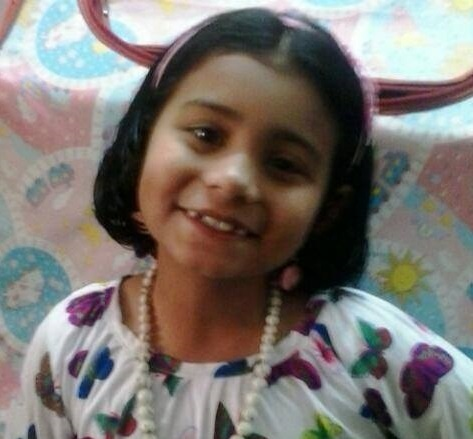

In [4]:
img = cv.imread("/content/data/without_mask/without_mask_1009.jpg")
cv2_imshow(img)

In [5]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255 , validation_split=0.2 ,  shear_range=0.2,zoom_range=0.2,horizontal_flip=True )
val_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.255)

In [6]:
dir = "/content/data"
train_data = train_generator.flow_from_directory(dir , target_size=(150 , 150 , ) , class_mode = "categorical")
val_data = val_generator.flow_from_directory(dir , target_size=(150 , 150 ) , class_mode = 'categorical')


Found 7553 images belonging to 2 classes.
Found 7553 images belonging to 2 classes.


In [7]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(filters = 64 , kernel_size=(3 , 3) , activation = 'relu' , input_shape = (150 , 150  , 3)))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Conv2D(filters = 64 , kernel_size=(3 , 3) , activation = 'relu' ))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(units = 2 , activation = tf.nn.softmax))


In [8]:
model.compile( loss =  tf.keras.losses.binary_focal_crossentropy , metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 82944)             0         
                                                                 
 dropout (Dropout)           (None, 82944)             0

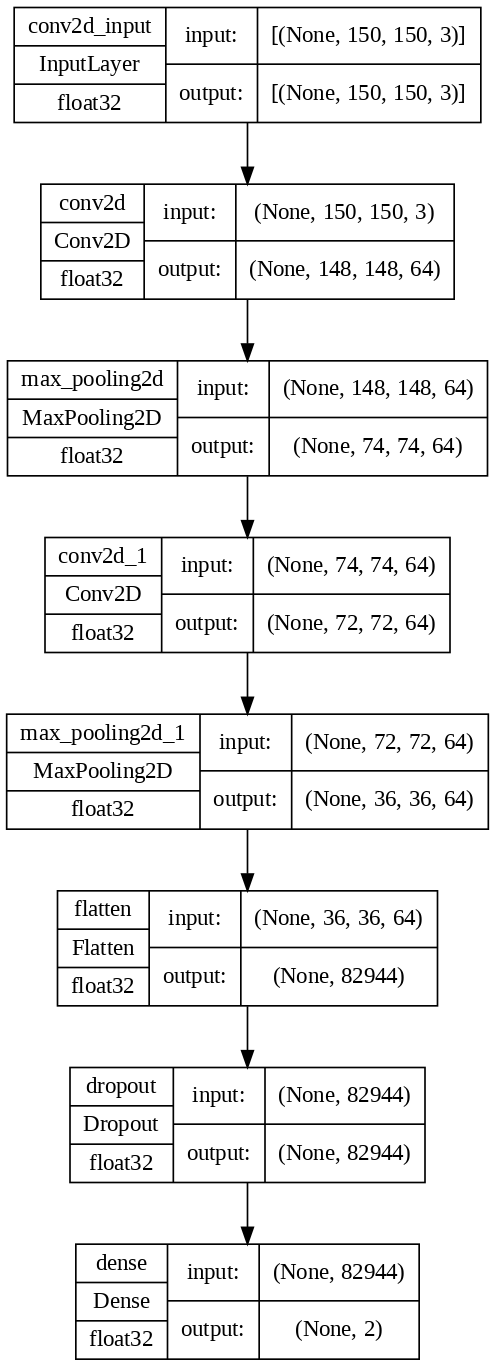

In [52]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True,show_dtype=True,dpi=120)

In [10]:
history = model.fit(x=train_data, epochs=3, validation_data=val_data, verbose=1)

Epoch 1/3
106/237 [============>.................] - ETA: 6:28 - loss: 0.2594 - accuracy: 0.7221

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


237/237 [==============================] - 885s 4s/step - loss: 0.1683 - accuracy: 0.7961 - val_loss: 1.6468 - val_accuracy: 0.8873
Epoch 2/3
237/237 [==============================] - 882s 4s/step - loss: 0.0844 - accuracy: 0.8797 - val_loss: 1.4348 - val_accuracy: 0.9026
Epoch 3/3
237/237 [==============================] - 868s 4s/step - loss: 0.0729 - accuracy: 0.8908 - val_loss: 1.9794 - val_accuracy: 0.8648


In [11]:
model.fit(x=train_data, epochs=2, validation_data=val_data, verbose=1)

Epoch 1/2
237/237 [==============================] - 865s 4s/step - loss: 0.0694 - accuracy: 0.8992 - val_loss: 1.1524 - val_accuracy: 0.9198
Epoch 2/2
237/237 [==============================] - 865s 4s/step - loss: 0.0642 - accuracy: 0.9065 - val_loss: 1.1261 - val_accuracy: 0.9229


In [40]:
hist  =  {**model.history.history, **history.history}
print(hist)

{'loss': [0.16830654442310333, 0.08435139060020447, 0.0729166716337204], 'accuracy': [0.7961075305938721, 0.8796504735946655, 0.8907718658447266], 'val_loss': [1.6467921733856201, 1.434823751449585, 1.9793851375579834], 'val_accuracy': [0.8873295187950134, 0.9025552868843079, 0.8648219108581543]}


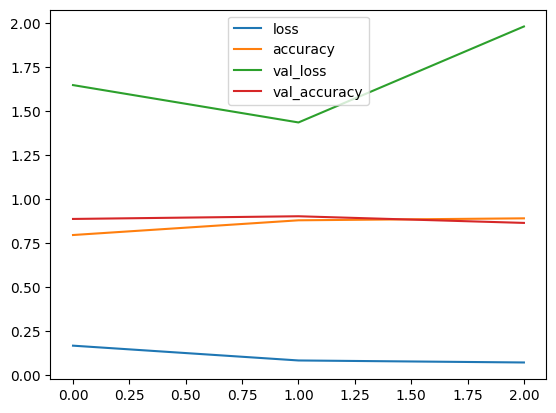

In [41]:
for key , value in hist.items():
  plt.plot(value , label = key )
plt.legend()
plt.show()

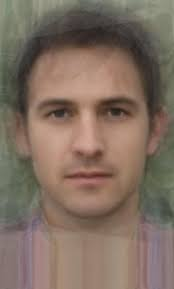

This is the shape of the image (150, 150, 3)
1/1 [==============================] - 0s 67ms/step


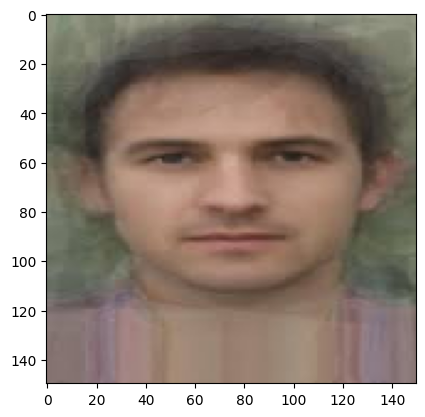

In [45]:
img_path = '/content/data/without_mask/without_mask_1143.jpg'
img = cv.imread(img_path)
cv2_imshow(img)
imgp = tf.keras.preprocessing.image.load_img(img_path, target_size=(150, 150))
plt.imshow(imgp)
x = tf.keras.preprocessing.image.img_to_array(imgp)
print("This is the shape of the image" , x.shape)
x = np.expand_dims(x, axis=0)
preds = model.predict(x)

In [46]:
print(preds)
map_of_classes = train_data.class_indices

[[0. 1.]]


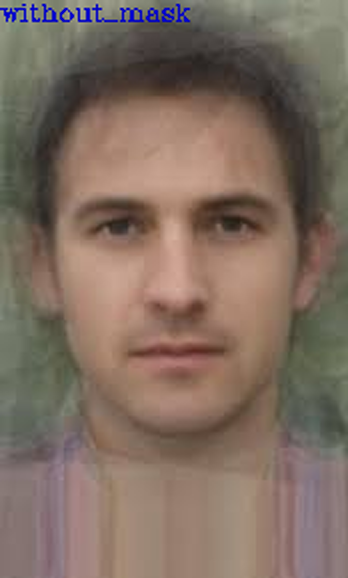

In [47]:
result = ""
for key , value in map_of_classes.items():
  if value == np.argmax(preds):
    result = key
    break
result

cv.putText(img=img , text = result ,color=200, fontFace=cv.FONT_HERSHEY_COMPLEX, fontScale=0.4, org = (0, 10) )
img = cv.resize(fx=2 ,fy = 2  , src = img , interpolation= 2 , dsize = None)
cv2_imshow(img)

In [48]:
model.save("model.h5")

In [51]:
# Load or create a Keras model
model = tf.keras.models.load_model('model.h5')

# Convert the model to TFLite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TFLite model to a file
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)
import warnings

warnings.filterwarnings("ignore", category=Warning, module="tensorflow")